In [1]:
from imports import np, plt
from constants import *
total = np.load(f'{CACHE_PATH}/jackknife_cvirs.npy')
total.shape

(611, 13)

In [2]:
slices = [0, 100, 200, 300, 400, 500, 561, 595, 611]

In [ ]:
plt.hist(total[:100, -1]/np.mean(total[:100, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[0])}-{np.log10(MASS_BINS[1])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[100:201, -1]/np.mean(total[100:201, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[1])}-{np.log10(MASS_BINS[2])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[200:301, -1]/np.mean(total[200:301, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[2])}-{np.log10(MASS_BINS[3])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[300:401, -1]/np.mean(total[300:401, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[3])}-{np.log10(MASS_BINS[4])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[400:501, -1]/np.mean(total[400:501, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[4])}-{np.log10(MASS_BINS[5])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[500:561, -1]/np.mean(total[500:561, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[5])}-{np.log10(MASS_BINS[6])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[560:595, -1]/np.mean(total[560:595, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[6])}-{np.log10(MASS_BINS[7])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.hist(total[594:611, -1]/np.mean(total[594:611, -1]), label=f'Halo Mass: {np.log10(MASS_BINS[7])}-{np.log10(MASS_BINS[8])}', bins=np.linspace(0, 2.5, 15), alpha=0.5)
plt.legend()
plt.savefig('figures/cvir_dispersion_hist.png')

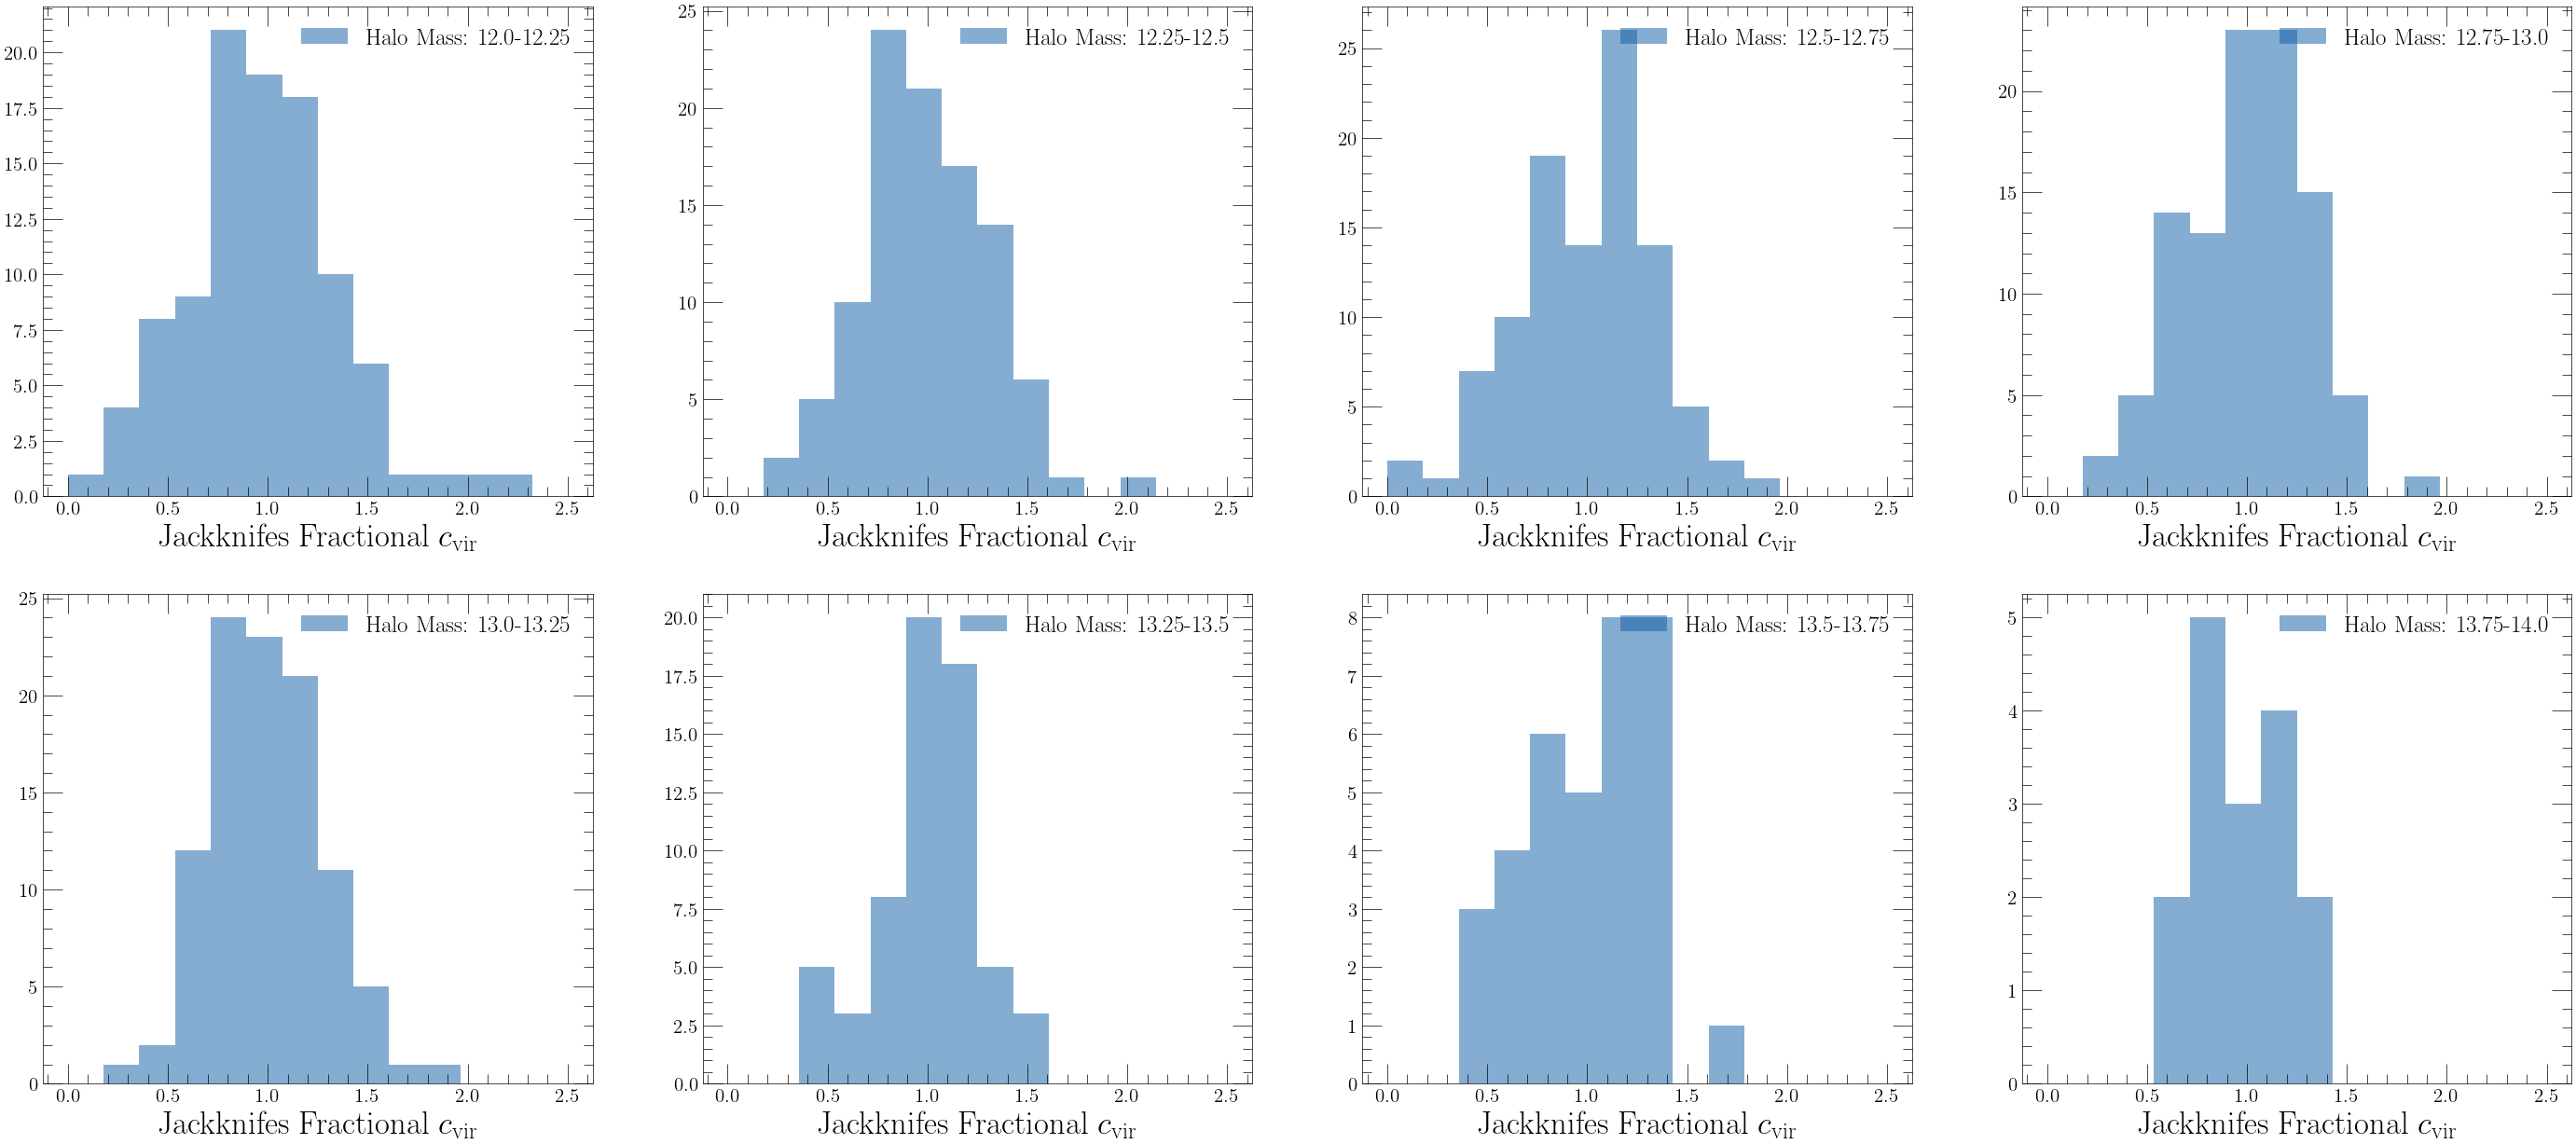

In [13]:
plt.subplots(2, 4, figsize=(35, 15))
for i in range(8):
    plt.subplot(2, 4, i+1)
    hm = f'{np.log10(MASS_BINS[i])}-{np.log10(MASS_BINS[i+1])}'
    plt.hist(total[slices[i]: slices[i + 1] + 1, -1]/np.mean(total[slices[i]: slices[i + 1] + 1, -1]), label=f'Halo Mass: {hm}', bins=np.linspace(0, 2.5, 15), alpha=0.5)  # type: ignore
    plt.legend(prop={'size':18})
    plt.xlabel(r'Jackknifes Fractional $c_\mathrm{{vir}}$')
    # plt.savefig(f'figures/cvir_dispersion_hist_{hm}.png')
    # plt.clf()

# plt.show()
plt.savefig(f'figures/cvir_dispersion_hist_subplots.png')

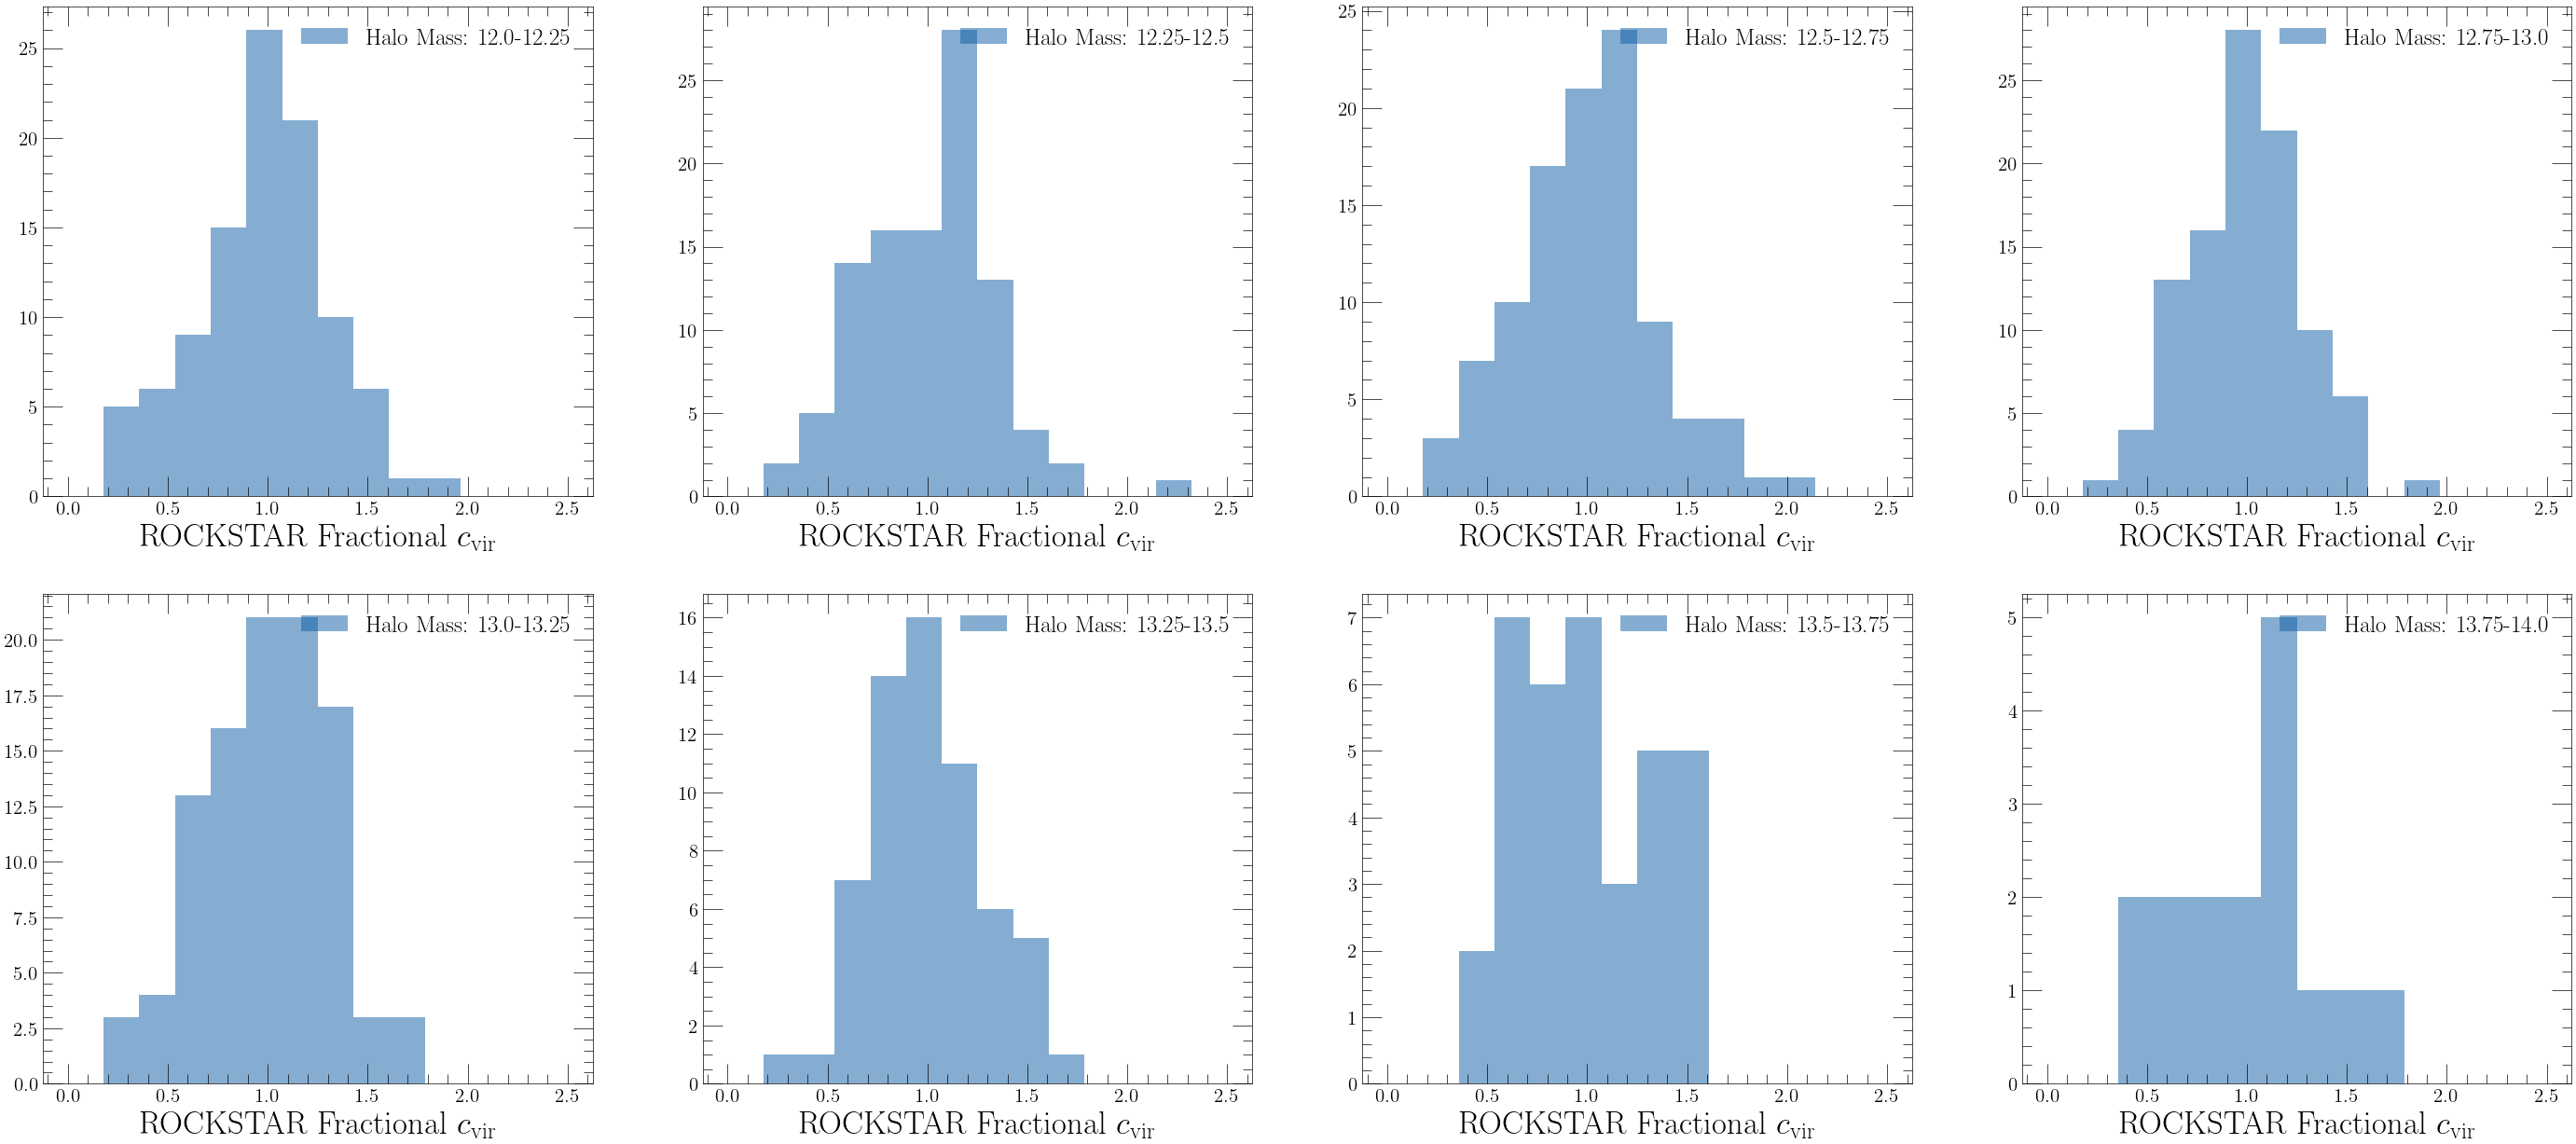

In [12]:
plt.subplots(2, 4, figsize=(35, 15))
for i in range(8):
    plt.subplot(2, 4, i+1)
    hm = f'{np.log10(MASS_BINS[i])}-{np.log10(MASS_BINS[i+1])}'
    plt.hist(total[slices[i]: slices[i + 1] + 1, 2]/np.mean(total[slices[i]: slices[i + 1] + 1, 2]), label=f'Halo Mass: {hm}', bins=np.linspace(0, 2.5, 15), alpha=0.5)  # type: ignore
    plt.legend(prop={'size':18})
    plt.xlabel(r'ROCKSTAR Fractional $c_\mathrm{{vir}}$')
    # plt.savefig(f'figures/cvir_dispersion_hist_{hm}.png')
    # plt.clf()

# plt.show()
plt.savefig(f'figures/cvir_dispersion_hist_subplots_rockstar.png')

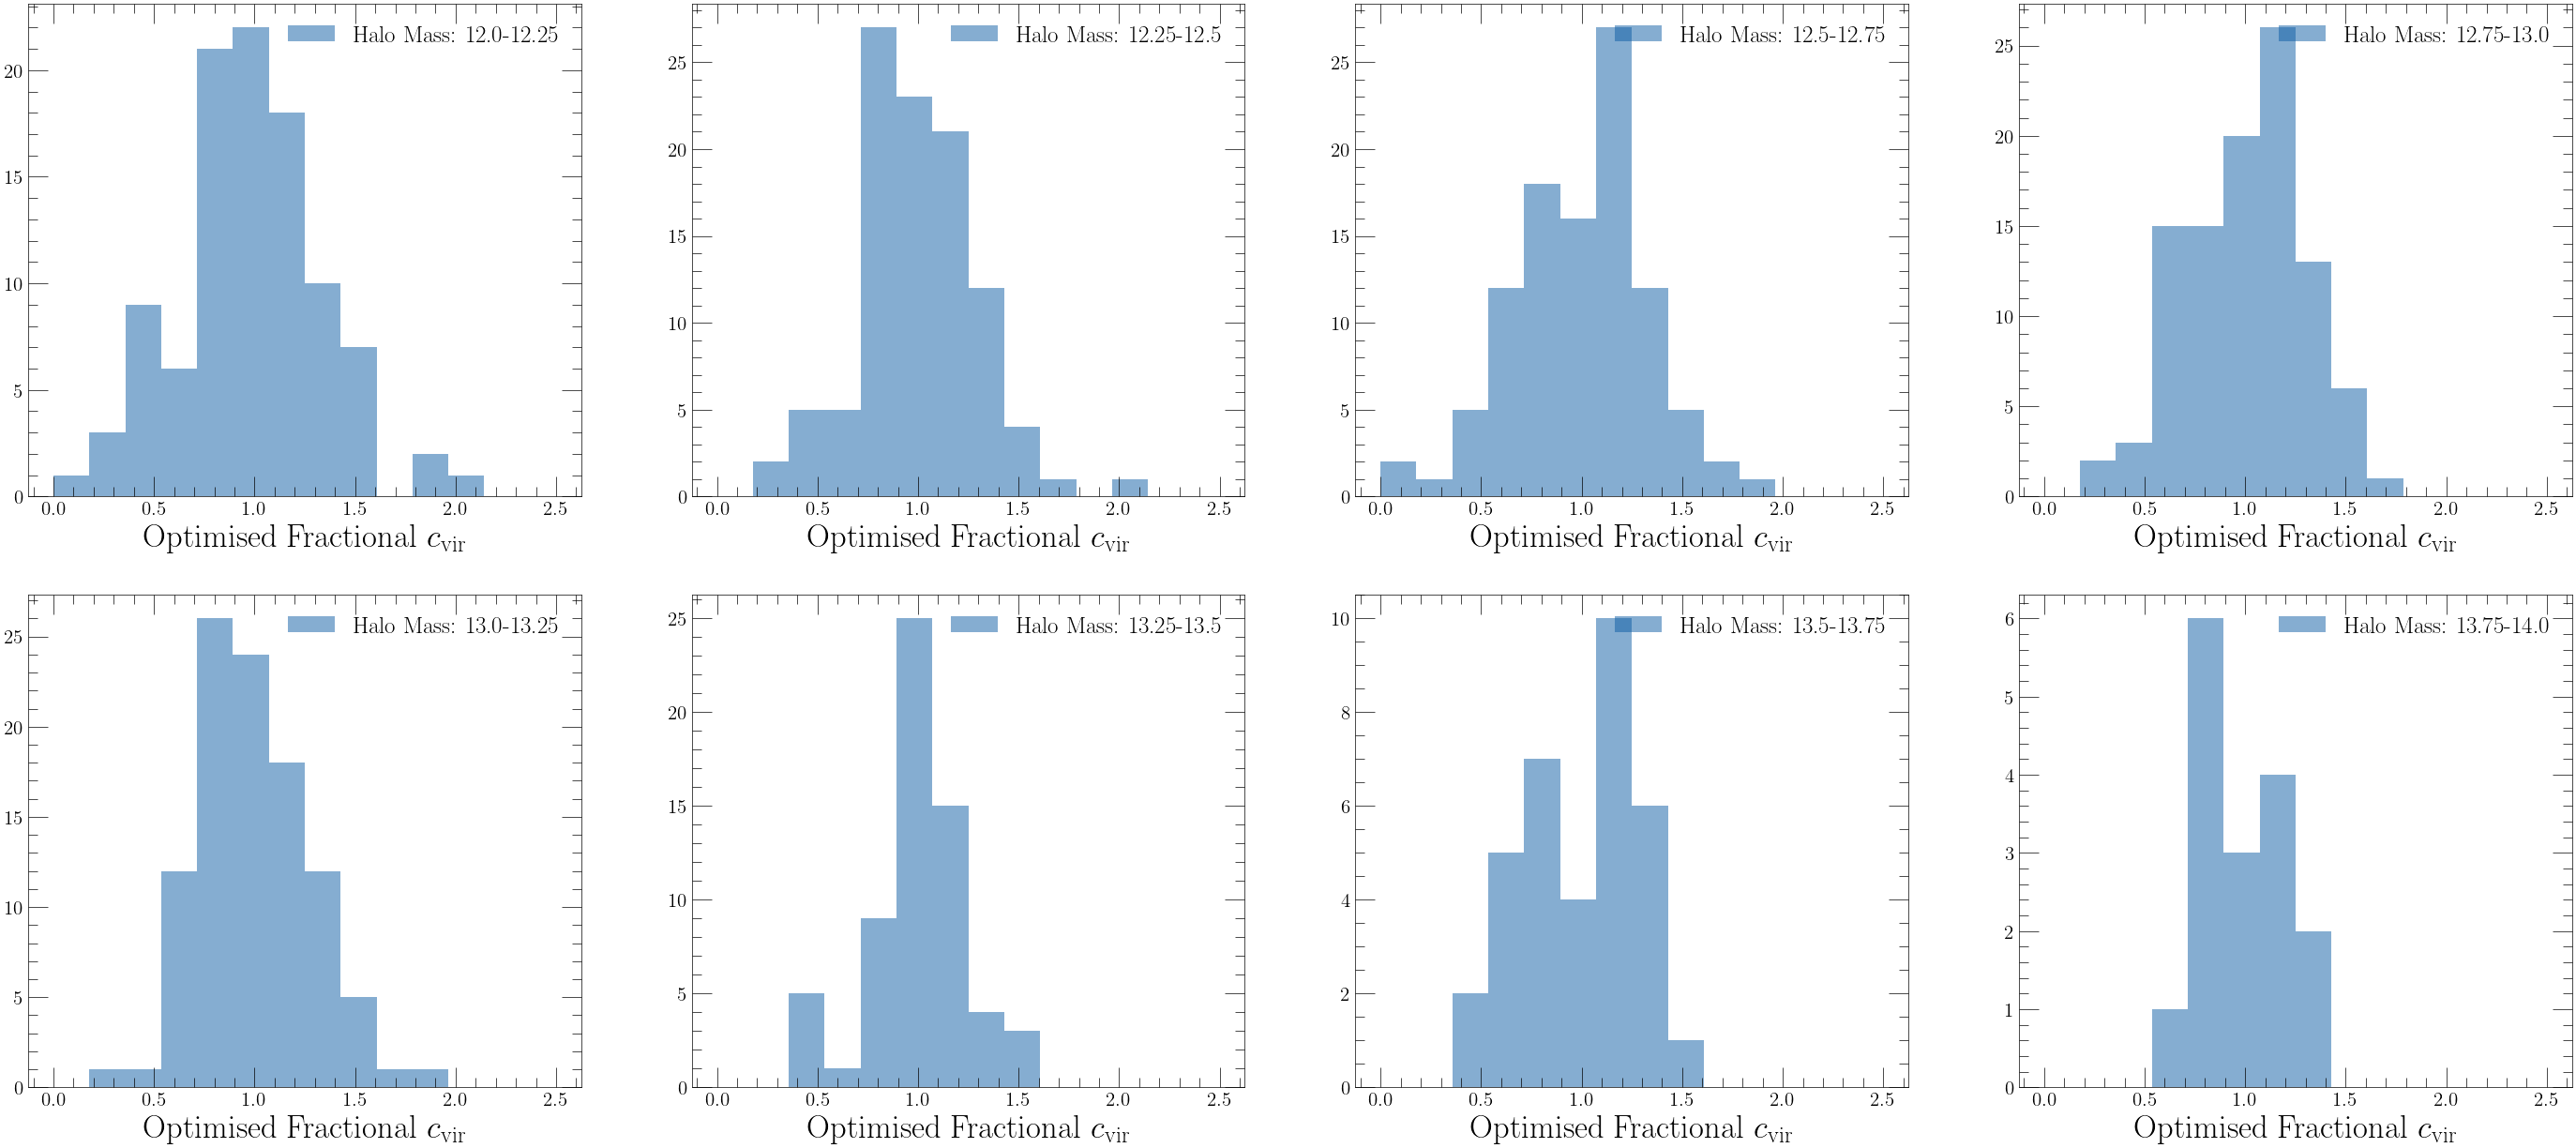

In [15]:
plt.subplots(2, 4, figsize=(35, 15))
for i in range(8):
    plt.subplot(2, 4, i+1)
    hm = f'{np.log10(MASS_BINS[i])}-{np.log10(MASS_BINS[i+1])}'
    plt.hist(total[slices[i]: slices[i + 1] + 1, 3]/np.mean(total[slices[i]: slices[i + 1] + 1, 3]), label=f'Halo Mass: {hm}', bins=np.linspace(0, 2.5, 15), alpha=0.5)  # type: ignore
    plt.legend(prop={'size':18})
    plt.xlabel(r'Optimised Fractional $c_\mathrm{{vir}}$')
    # plt.savefig(f'figures/cvir_dispersion_hist_{hm}.png')
    # plt.clf()

# plt.show()
plt.savefig(f'figures/cvir_dispersion_hist_subplots_opts.png')

In [3]:
X = np.array([])
Y1 = np.array([])
Y2 = np.array([])
Y3 = np.array([])
for i in range(8):
    y1 = np.std(total[slices[i]: slices[i + 1] + 1, -1])
    y2 = np.std(total[slices[i]: slices[i + 1] + 1, 2])
    y3 = np.std(total[slices[i]: slices[i + 1] + 1, 3])
    x = np.mean([MASS_BINS[i], MASS_BINS[i + 1]])
    X = np.append(X, x)
    Y1 = np.append(Y1, y1)
    Y2 = np.append(Y2, y2)
    Y3 = np.append(Y3, y3)

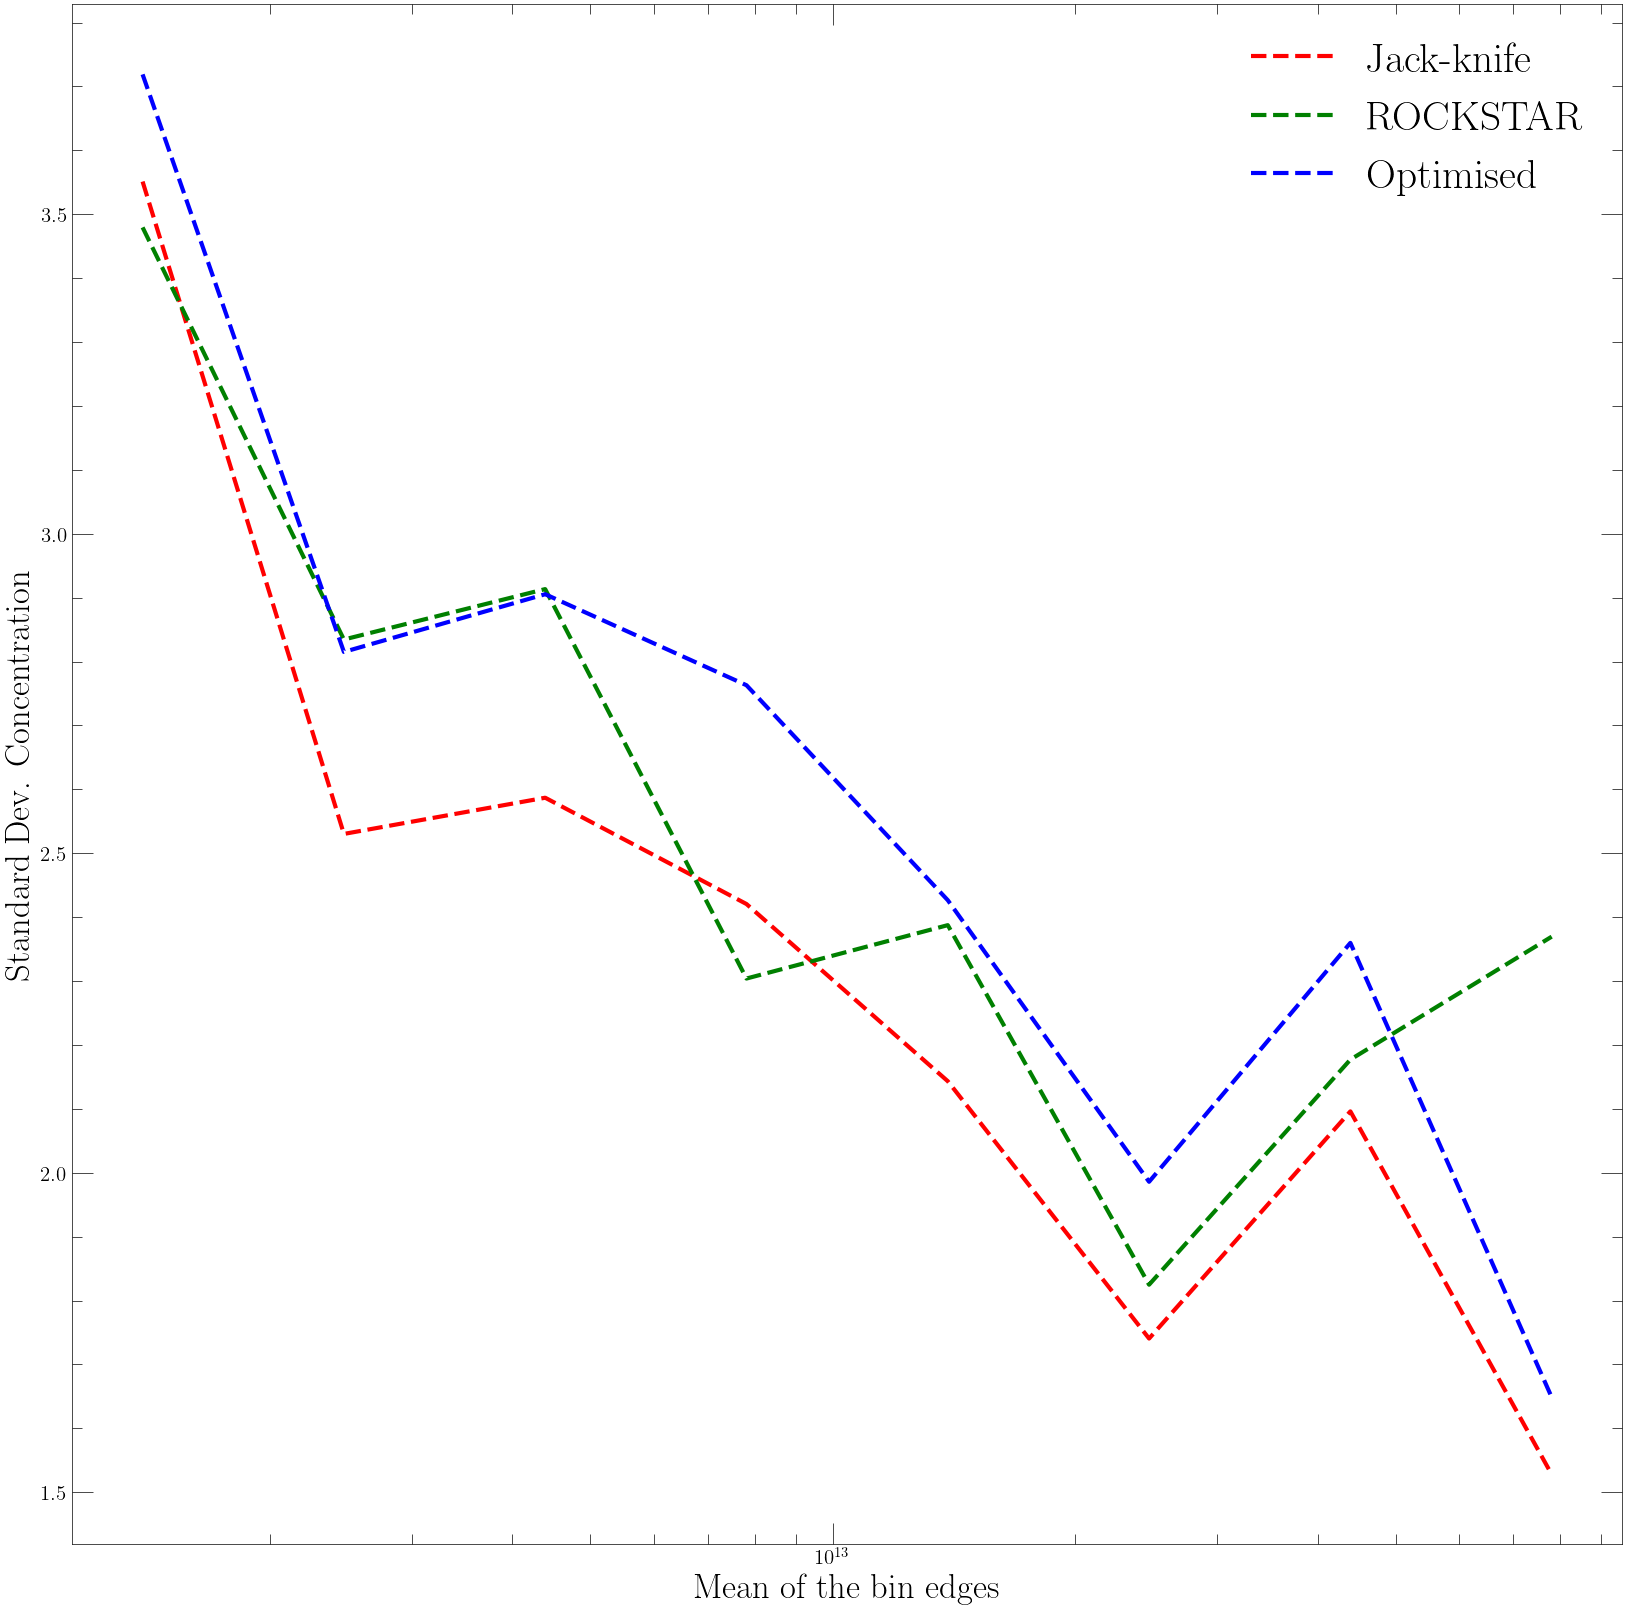

In [4]:
# plt.scatter(X, Y1, color='black', s=100, label='Jack-knife Points')
# plt.scatter(X, Y2, color='black', s=100, label='Jack-knife Points')
# plt.scatter(X, Y3, color='black', s=100, label='Jack-knife Points')
plt.plot(X, Y1, 'r--', linewidth=3, label='Jack-knife')
plt.plot(X, Y2, 'g--', linewidth=3, label='ROCKSTAR')
plt.plot(X, Y3, 'b--', linewidth=3, label='Optimised')
plt.xscale('log')
plt.ylabel('Standard Dev. Concentration')
plt.xlabel('Mean of the bin edges')
plt.legend()
plt.show()

In [7]:
s_c = np.std(total[:, 4:-1], axis=1)
total = np.column_stack((total, s_c))

1.7908601954600476

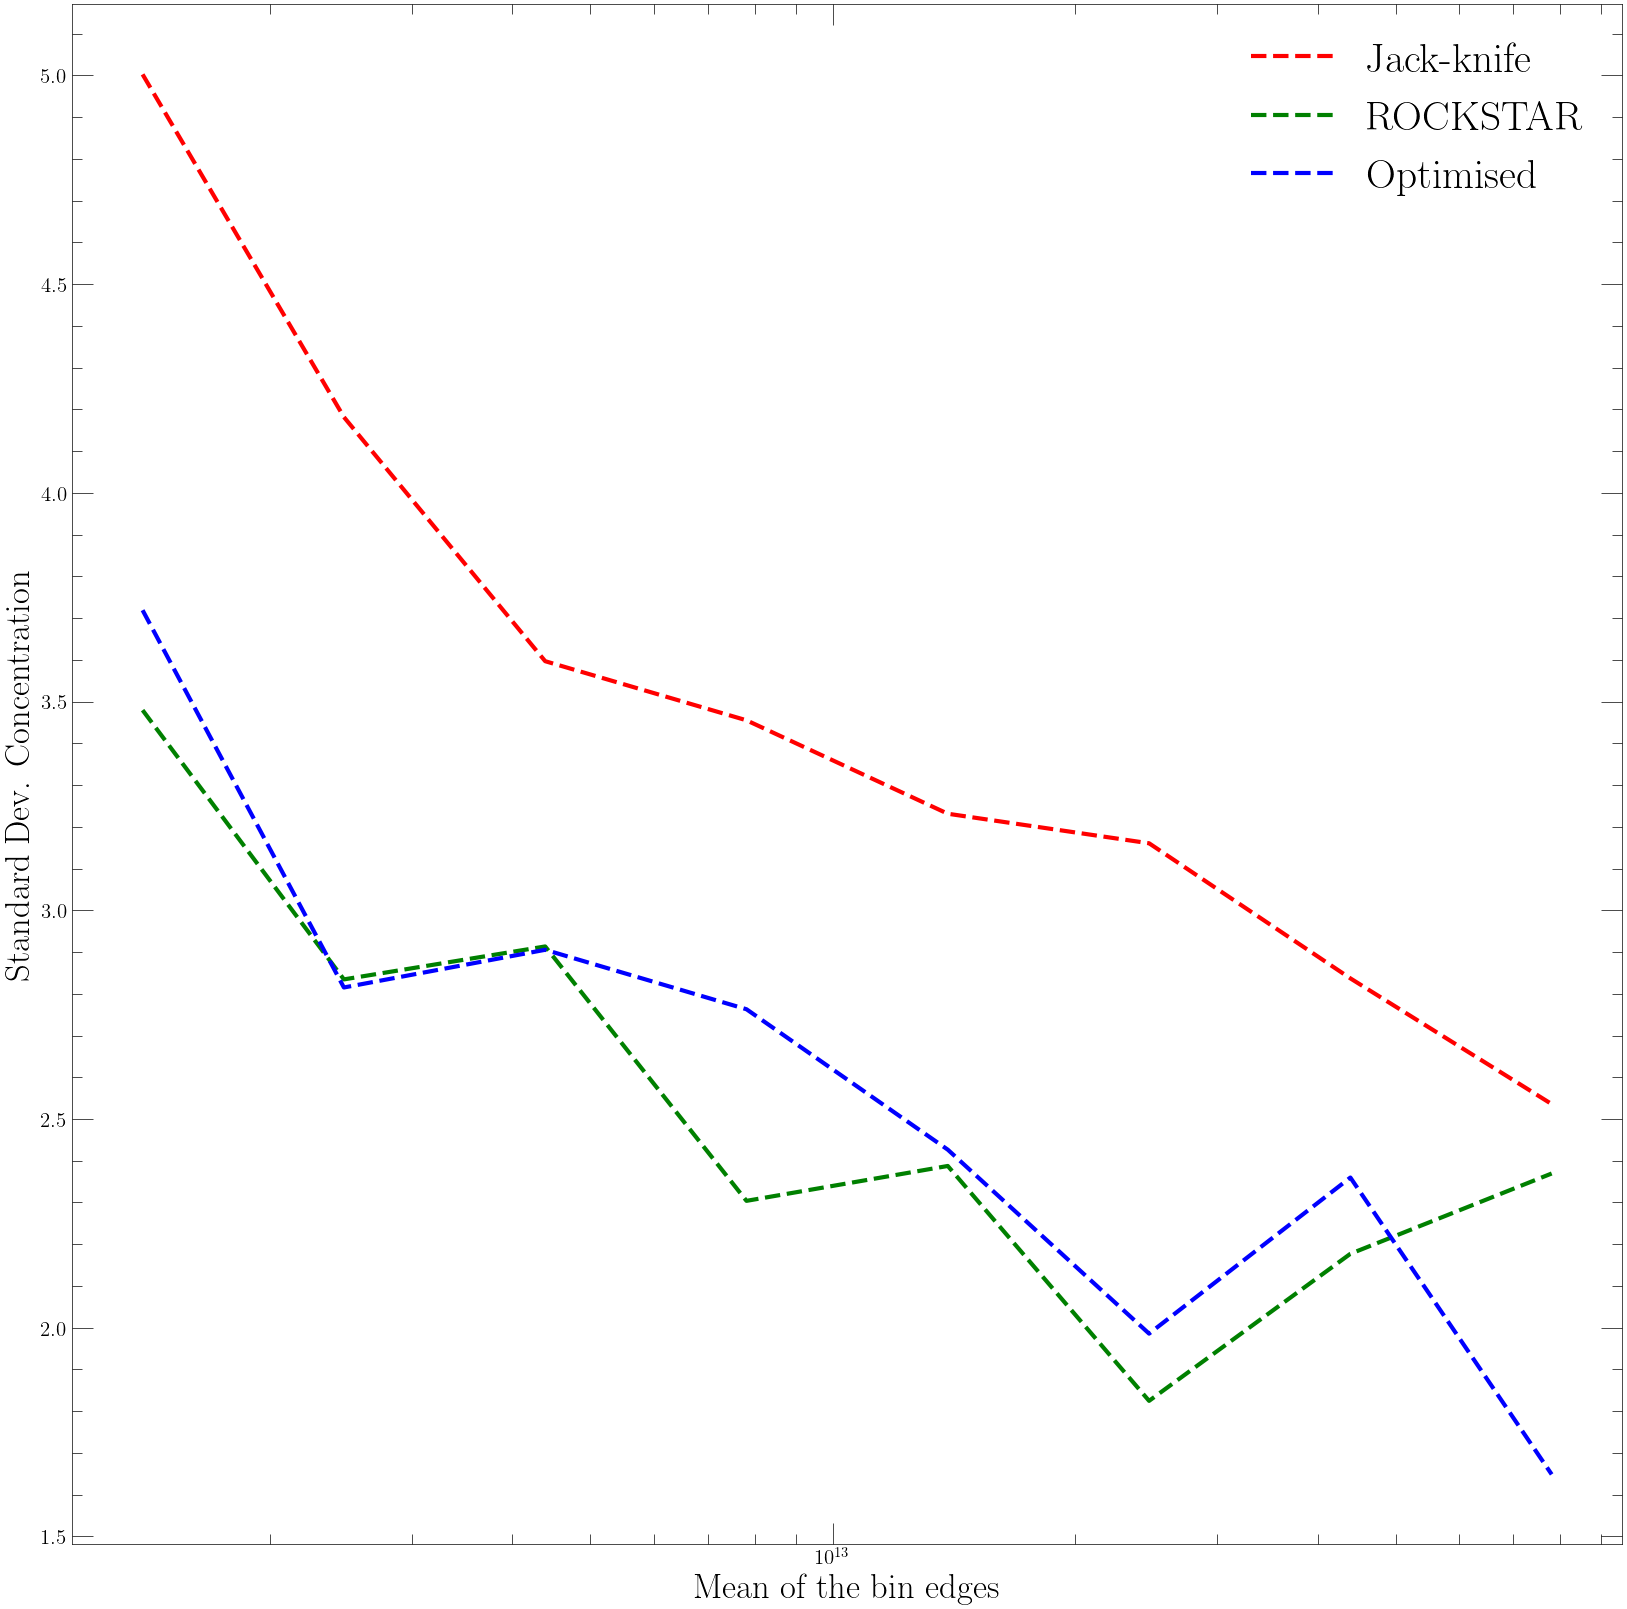

In [18]:
X = np.array([])
Y1 = np.array([])
Y2 = np.array([])
Y3 = np.array([])
for i in range(8):
    y1 = 7 * np.mean(total[slices[i]: slices[i + 1] + 1, -1])
    y2 = np.std(total[slices[i]: slices[i + 1] + 1, 2])
    y3 = np.std(total[slices[i]: slices[i + 1] + 1, 3])
    x = np.mean([MASS_BINS[i], MASS_BINS[i + 1]])
    X = np.append(X, x)
    Y1 = np.append(Y1, y1)
    Y2 = np.append(Y2, y2)
    Y3 = np.append(Y3, y3)

plt.plot(X, Y1, 'r--', linewidth=3, label='Jack-knife')
plt.plot(X, Y2, 'g--', linewidth=3, label='ROCKSTAR')
plt.plot(X, Y3, 'b--', linewidth=3, label='Optimised')
plt.xscale('log')
plt.ylabel('Standard Dev. Concentration')
plt.xlabel('Mean of the bin edges')
plt.legend()
plt.show()